# Loading and Cleaning of Data.

In [152]:
import seaborn as sns, numpy as np, pandas as pd, matplotlib.pyplot as plt #import necessary libraries

sns.set_theme()     #using a default theme for oresentation.

In [153]:
#loading the dataset into the worksheet

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [154]:
#converting category datatype to objects. for similarity.

convert_dtype = {"class": object,
                "deck": object}
df = df.astype(convert_dtype)
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [155]:
#renamin columns for uniformity.

df.rename(columns={"survived": "Survived",
                   "pclass": "PClass", 
                   "sex": "Gender",
                   "age": "Age",
                   "sibsp": "Sibsp",
                   "parch": "Parch",
                   "fare": "Fare",
                   "class": "Class",
                   "who": "Who",
                   "deck": "Deck",
                   "embark_town": "Embarkment",
                   "adult_male": "AdultMale",
                  "alive": "Alive",
                  "alone": "Alone"}, inplace=True)

#deleting embarked column from the dataset because it is similar to "embarkment"

df.drop(["embarked"], axis=1, inplace=True)

In [156]:
#replacing missing numerical values

num = df.select_dtypes(include=np.number)
num_columns = num.columns
df[num_columns] = df[num_columns].fillna(df.mean())

C:\Users\titus\AppData\Local\Temp/ipykernel_42976/3828849625.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[num_columns] = df[num_columns].fillna(df.mean())


In [157]:
obj_columns = df.select_dtypes(include= np.object).columns.tolist()
df[obj_columns] = df[obj_columns].astype("str")
df[obj_columns].fillna(df.mode)

#replcaing "NaN" values in deck column with the highest occuring value "C"
df['Deck'] = df['Deck'].replace(['nan'],['C'])

C:\Users\titus\AppData\Local\Temp/ipykernel_42976/2268518554.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_columns = df.select_dtypes(include= np.object).columns.tolist()


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   PClass      891 non-null    int64  
 2   Gender      891 non-null    object 
 3   Age         891 non-null    float64
 4   Sibsp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Class       891 non-null    object 
 8   Who         891 non-null    object 
 9   AdultMale   891 non-null    bool   
 10  Deck        891 non-null    object 
 11  Embarkment  891 non-null    object 
 12  Alive       891 non-null    object 
 13  Alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


# Visualization

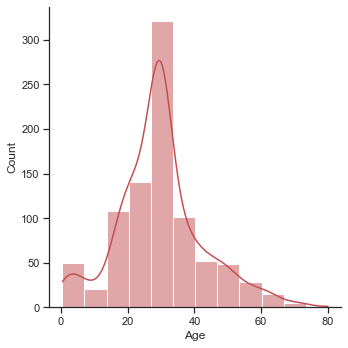

In [159]:
#1. Showing the Age distribution of the passengers.

sns.set_style("ticks")
sns.set_color_codes()
sns.displot(data=df, x="Age", bins=12, color="r", kde=True,)
          

The Histogram shows the Age distribution of the passengers on the ship. From the plot, the age demography on board the ship can be found between the ages of 25-35. 

<AxesSubplot:title={'center':'Number of Male vs Female'}, xlabel='Gender', ylabel='count'>

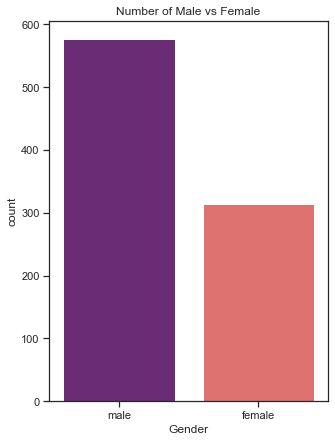

In [160]:
#2. Display the gender of the passengers .

sns.set_style("ticks")
fig = plt.figure(figsize=(5, 7))
plt.title("Number of Male vs Female")
sns.countplot(data=df, x="Gender", palette="magma",)

From the Bar chart visual, we could confirm that the Male gender is the highest gender demography onboard the ship.

<AxesSubplot:title={'center':'Classes'}, xlabel='Class', ylabel='count'>

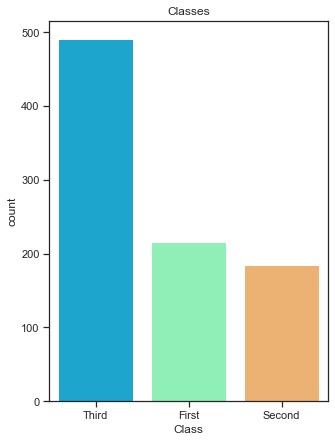

In [161]:
#3. Classes available on the ship

sns.set_style("ticks")
fig = plt.figure(figsize=(5, 7))
plt.title("Classes")
sns.countplot(data=df, x="Class", palette="rainbow",)

The plot above shows the distribution of the Classes onboard the ship. It shows the Third class is the most occupied class on the ship.

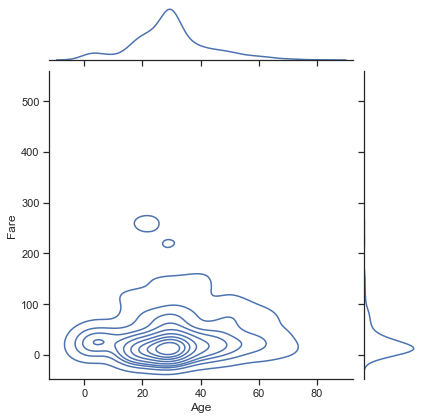

In [165]:
#4.  Using joint plot to explore the relationship between the age and fare.

sns.set_style("ticks")
sns.jointplot(data=df, x="Age", y="Fare", kind="kde")

There is a concentration of the amount/contribution to fare charges around the age group of 20 - 40 yrs. the relationship is denser around the age limit of 30-35.
